
# Ejercicio 3

El circuito de la figura corresponde a un amplificador de RF que opera a $F_o = 3\,MHz$. 

Todos los sintonzados estan adaptados a MTE Qcte, son sincronicos. 

Los inductores son idénticos entre sí, presentan $Q_{oL} = 80$ y ambos están realizados con $N = 100$ espiras.


![ejemplo4-cuatrocientos](fig/ejercicio3g.png)

Se desea emplear un transistor PN918. Operando con $I_{Cq} = 6 mA$ y $V_{CE} = 10 V$, el transistor posée los siguientes parámetros, que se mantienen constantes en la banda de interes.

$Y_{11} = (1.6 + j0.8) mS$	

$Y_{12} = (-0.02-j0.08) mS$

$Y_{21} = (100-j20) mS$

$Y_{22} = (0.1 + j0.2) mS$    

Suponer que $Y_{12} = 0$ 

Debido a que se desea realizar un ensayo del mismo, el amplificador es conectado a un generador con $z_g = 50 \Omega$, que entrega una señal de tensión cuadrada simétrica sin componente de DC con $V_{g} = 2 mV_{pp}$ y frecuencia fundamental $f_{c} = 1 MHz$.

Un analizador de espectro, conectado sobre $R_L = 1\,K\Omega $, barriendo desde $100 KHz$ a $21 MHz$, encuentra que la mayor componente es de $3 MHz$ y esta se encuentra exactamente $60 dB$ por encima de siguiente armónico de mayor amplitud.



Determinar:
1. Dada la separación entre las componentes de la señal de excitación ¿Es adecuado el empleo de aproximación de Banda angosta? en caso de poderse ¿Cuando no sería adecuado?.

2. Los $Q_{c}$ de cada Simple Sintonizado.

3. $L_1$ 

4. $C_1$

5. Los valores para $N_1$ y  $N_2$.

6. $C_2$ y $C_3$

7. Módulo de la componente en tensión de $f = 3 MHz$ sobre la carga $R_L$. 

8. Módulo de la componente en tensión de $f = 1 MHz$ sobre la carga $R_L$. 

9. Proponga una red de polarización para el transistor.

10. Verificar empleando simuladores.


Para resolver este ejercicios recordemos el desarrollo de series de fourier de una señal.

La serie de Fourier asociada a $x(t)\,$  de la señal cuadrada de la entrada, cuadrada $2 mVpp$ y $1 MHz$ es:

$$x(t) \sim \frac{a_0}{2} + \sum_{k=1}^\infty\left[a_k\cos \left( \frac{2\pi k}{T}t \right) + b_k\sin \left( \frac{2\pi k}{T}t \right) \right]$$

Donde $a_0$, $a_k$ y $b_k$ son los coeficientes de la serie de Fourier que toman los valores:

$$a_0 = \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}}  x(t) dt$$

$$a_k = \frac{2}{T} \int_{-T/2}^{T/2}  x(t) \cos \left( \frac{2 \pi k}{T} t \right) dt$$

$$b_k = \frac{2}{T} \int_{-T/2}^{T/2}  x(t) \sin \left(\frac{2 \pi  k}{T} t\right) dt$$




Luego, tengamos en cuenta las dos condiciones posibles:

    . La de mayor amplitud esta en 5 MHz después de la componente de 3 MHz, entonces el circuito debe atenuar 55,56 dB.
    
    . Si suponemos que la de mayor amplitud esta en 1 MHz, para verificar el resultado anterior. Después de la componente de 3 MHz, entonces el circuito debe atenuar 69,54 dB


Para resolver este ejercicios recordemos el desarrollo de series de fourier de una señal.

La serie de Fourier asociada a $x(t)\,$  de la señal cuadrada de la entrada, cuadrada $2 mVpp$ y $1 MHz$ es:

$$x(t) \sim \frac{a_0}{2} + \sum_{k=1}^\infty\left[a_k\cos \left( \frac{2\pi k}{T}t \right) + b_k\sin \left( \frac{2\pi k}{T}t \right) \right]$$

Donde $a_0$, $a_k$ y $b_k$ son los coeficientes de la serie de Fourier que toman los valores:

$$a_0 = 0$$

## Calculo de armonicos

$$a_k = \frac{ 2 \cdot 2mV }{\pi} \int_{0}^{\frac{\pi}{4}} cos(\theta \cdot k) d\theta$$

$$a_k = \frac{ 2mV }{\pi}  \frac{sin(\theta \cdot k)}{k} |_{\frac{-\pi}{4}}^{\frac{\pi}{4}}$$

$$a_k = \frac{ 2 2mV }{\pi \cdot k}  sin(\frac{\pi k}{4}) $$

### 1er armonico

$$a_1 = \frac{2 \cdot 2mV }{\pi \cdot 1}$$

$$a_1 = 1.273 mV$$

### 2do armonico
$$a_2 =  0$$

### 3er armonico

$$a_3 = \frac{2 \cdot 2mV }{\pi \cdot 3}$$

$$a_3 = -0.424 mV$$

### 4to armonico

$$a_4 = 0$$

### 5to armonico

$$a_5 = \frac{2 \cdot 2mV }{\pi \cdot 5}$$

$$a_5 = 0.255 mV$$


## Primera suposicion
La de mayor amplitud esta en $5 MHz$ después de la componente de $3 MHz$, entonces el circuito debe atenuar $55,56 dB$.

La transferencia de un simple sintonizado

$|A| = \frac{1}{\sqrt{1 +  Q_c^2 (\frac{f_{img}}{f_o}-\frac{f_o}{f_{img}})^2 }}$


In [6]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

import matplotlib.pyplot as plt
import numpy as np

from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 16,
          'figure.figsize': (10, 8),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
plt.rcParams.update(params) 

from scipy.fftpack import fft, fftfreq
from time import time

In [28]:
# Señal cuadrada
def FrSq(n):
    return 2*np.sin(n*np.pi/2)/(np.pi*n)

A = 2e-3

a1 = A*FrSq(1)
a2 = A*FrSq(2)
a3 = A*FrSq(3)
a4 = A*FrSq(4)
a5 = A*FrSq(5)

print('$$a_1 = {:1.3f} mV$$'.format(a1/1e-3))
print('$$a_2 = {:1.3f} mV$$'.format(a2/1e-3))
print('$$a_3 = {:1.3f} mV$$'.format(a3/1e-3))
print('$$a_4 = {:1.3f} mV$$'.format(a4/1e-3))
print('$$a_5 = {:1.3f} mV$$'.format(a5/1e-3))



$$a_1 = 1.273 mV$$
$$a_2 = 0.000 mV$$
$$a_3 = -0.424 mV$$
$$a_4 = -0.000 mV$$
$$a_5 = 0.255 mV$$


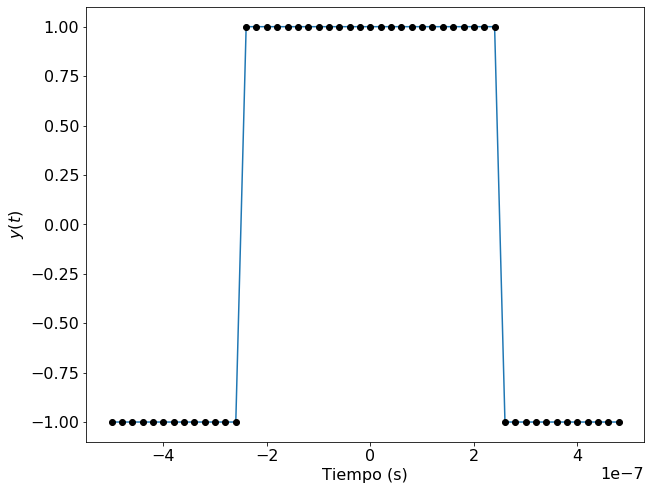

In [12]:
f  = 1e6     # Hz
T  = (1/f)
A  = 2e-3

fs = f*50    # muestreo
dt = 1/(fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t  = np.arange(0, T, dt)- T/2  # Intervalo de tiempo en segundos 
Nt= len(t)

y  = signal.square(2*np.pi*f*t+np.pi/2,duty=0.5)   # Señal

plt.plot(t, y)
plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


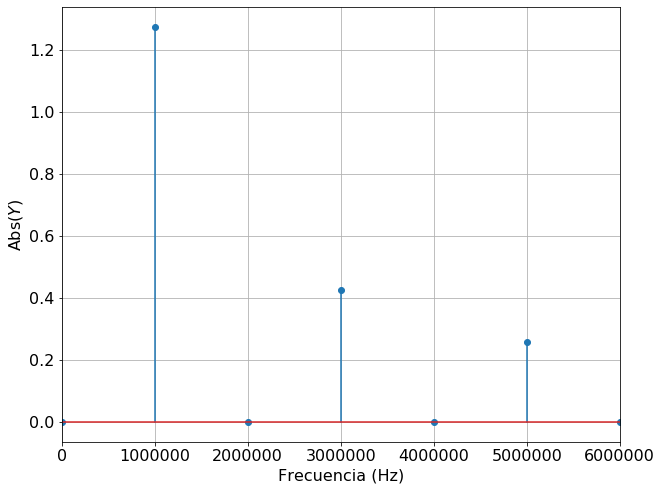

In [16]:
#start_time = time()
Y = fft(y) / len(y)  # Normalizada

#elapsed_time = time() - start_time
#print("Elapsed time: %.10f seconds." % elapsed_time)

frq  = fftfreq(len(y), dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y)*2 )  # Representamos la parte imaginaria
plt.xlim([0,6e6])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()